<a href="https://colab.research.google.com/github/lacouth/metodos_numericos/blob/master/01_raizes/raizes_geral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Métodos Numéricos
## Patric Lacouth
### lacouth@gmail.com

## Raízes

Há muito tempo,  você aprendeu a usar a fórmula quadrática

$$ x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a} $$

para resolver

$$ f(x) = ax^2 + bx + c = 0 $$

Os valores calculados na primeira equação são chamados "raízes" e representam os valores de x que tornam a segunda  igual a zero.

# Raízes e otimização
<img src = "imagens/exemplo_raizes.png" width = 60% style = "display:block; margin-left:auto;margin-right:auto;"/>

## Objetivos

* Encontrar o valor aproximado de raízes de funções contínuas

* Encontrar raízes dentro de intervalos.

* Encontrar raízes sem a necessidade de intervalos.

# Raízes - Principais Métodos

0. Busca Incremental
1. Bisseção
2. Cordas
3. Newton-Raphson
4. Secante

## Busca Incremental

* Dado um intervalo, se $f(x)$ mudar de sinal então existem pelo menos uma raiz
$$ f(x_1)f(x_2) < 0 $$
* Determinar subintervalos com raízes
* Lento
* Pode não encontrar todos os subintervalos

In [1]:
import numpy as np
import matplotlib.pyplot as plt

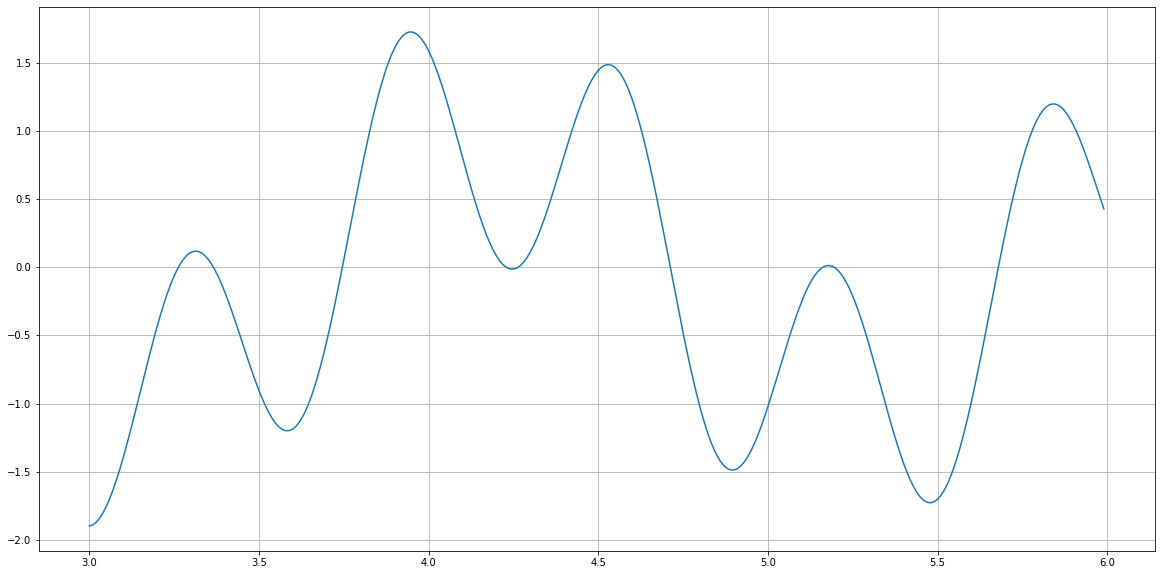

In [4]:

x = np.arange(3,6,0.01) # de 3 até 6 com incremento de 0.01
plt.figure(figsize=(20,10))
fx = np.sin(10*x)+np.cos(3*x)
plt.plot(x,fx)
plt.grid()
plt.show()

## BI - Implementação

In [3]:
def busca_incremental(funcao, xmin, xmax, passo = 0.1):
    x = np.arange(xmin, xmax, passo)
    subintervalos = []
    for xi in x:
        if funcao(xi)*funcao(xi+passo) < 0:
            subintervalos.append([xi,xi+passo])
    return subintervalos  

## Aplicando o algoritmo

In [5]:
def sen10_cos3(x):
    return np.sin(10*x)+np.cos(3*x)

In [8]:
intervalos = busca_incremental(sen10_cos3,3,6,0.1)
print('Foram encontrados {} subintervalos: '.format(len(intervalos)))
intervalos

Foram encontrados 5 subintervalos: 


[[3.2, 3.3000000000000003],
 [3.3000000000000003, 3.4000000000000004],
 [3.7000000000000006, 3.8000000000000007],
 [4.700000000000001, 4.800000000000001],
 [5.600000000000002, 5.700000000000002]]

# Bisseção

* Método Intervalar
* Sempre converge
* Simples - Busca Binária
* Equação de atualização:

$$  x_{meio} = \frac{(x_{max}+x_{min})}{2} $$

<img src="https://www.ufrgs.br/reamat/CalculoNumerico/livro-py/main3x.png" width = 50%/>

# Como calcular o erro de aproximação?

* Podemos fazer uma estimativa através de :

$$ | \varepsilon_a | = \left | \frac{x^{novo}_r - x^{velho}_r }{x^{novo}_r} \right| \times 100% $$

* O erro de aproximação estima o quanto o estimativa do algoritmo está se "movendo" ao longo das iterações.
* Não indica o quanto estamos próximos da resposta real.
* $ \varepsilon_a <= 5 \% $ indica que o primeiro dígito significativo já foi estimado.
* $ \varepsilon_a <= 0.5 \%$ indica que os dois primeiros dígitos significativos já foram estimados
* $ \varepsilon_a <= 0.05 \%$ indica que os três primeiros dígitos significativos já foram estimados
* ...


# Método das Cordas - (Falsa Posição)

* Método Intervalar
* Convergência garantida, quando houver uma raiz no intervalo
* A aproximação da raiz é dada pela raiz da reta secante entre dois pontos. 
* Menos iterações quando a raiz estiver próxima dos extremos do intervalo
* Pode ser mais lento que o método da bisseção quando a raiz estiver próxima do centro do intervalo

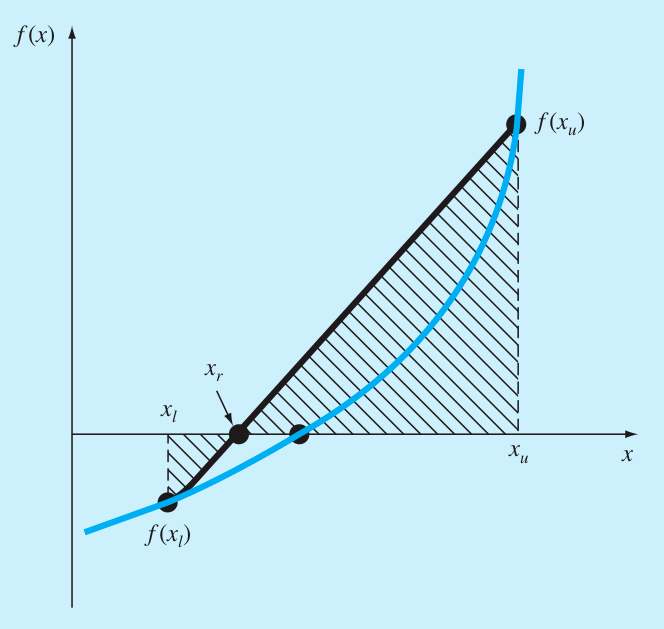

# Método das cordas 

## Equação de atualização:

$$ x_m = b + \frac{f(b)}{f(a) - f(b)}(b-a) $$

# Newton - Raphson

* Método aberto
* Precisa de um "chute" inicial $x_0$
* Mais rápido
* Sem convergência garantida
* Precisa da derivada da função $f(x)$

# Newton - Raphson

## Equação de atualização:

$$ x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)} $$

# Secante

* Método aberto
* Precisa de DOIS "chutes" iniciais $x_0$ e $x_1$
* Similar ao Newton-Raphson mas sem a necessidade da derivada analítica

# Secante

## Equação de atualização:

$$ x_{i+1} = x_i - \frac{f(x_i)(x_i-x_{i-1})}{f(x_i)-f(x_{i-1})} $$

# Go code!